# Parte 1 Problema 1 b


In [3]:
import random as rnd
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier


c:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
f = 100 #factor_escala = 100
n_samples = 1000

a = np.array([1, 1, 1, 1,
              1, 0, 0, 1,
              1, 0, 0, 1,
              1, 1, 1, 1])

b = np.array([1, 0, 0, 1,
              0, 1, 1, 0,
              0, 1, 1, 0,
              1, 0, 0, 1])

c = np.array([1, 0, 1, 0,
              0, 1, 0, 1,
              1, 0, 1, 0,
              0, 1, 0, 1])

d = np.array([1, 0, 1, 0,
              1, 0, 1, 0,
              1, 0, 1, 0,
              1, 0, 1, 0])

x = np.concatenate([[a],  [b],       [c],       [d]])
y = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

print(len(x))
print(len(y))

4
4


In [5]:
# criar amostras que faltam para ter um dataset de tamanho a n_samples
for i in range(n_samples - len(x)):
        x = np.append(x, [[rnd.randint(0, 1) for i in range(16)]], axis=0)
        y = np.append(y, [[0, 0, 0, 0]], axis=0)

print(len(x))
print(len(y))

1000
1000


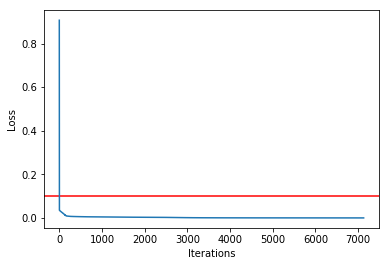

In [6]:
model = MLPClassifier(activation='relu',  #relu logistic tanh identity
                     solver='sgd',
                     max_iter=30000, 
                     hidden_layer_sizes=(32,4),
                     learning_rate_init=0.5,
                     shuffle=True,
                     momentum=0.5,
                     tol=0.000001,
                     n_iter_no_change=500).fit(x, y)


plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.plot(model.loss_curve_)
plt.show()

In [7]:
mlp = MLPClassifier(solver='sgd',
                    max_iter=30000,
                    shuffle=True,
                    tol=0.000001,
                    n_iter_no_change=500).fit(x, y)
mlp_params = {
    "hidden_layer_sizes":[(32, 8), (32, 16)],
    'learning_rate_init': [0.5, 0.8, 1, 1.5], 
    "activation": ["logistic","relu"],
    "momentum": [0.3, 0.5, 0.7]
}

mlp_cv = GridSearchCV(mlp, mlp_params, verbose=1).fit(x, y)

# optimum param
print("\n The best estimator across ALL searched params:\n",mlp_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",mlp_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",mlp_cv.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

 The best estimator across ALL searched params:
 MLPClassifier(activation='logistic', hidden_layer_sizes=(32, 8),
              learning_rate_init=0.5, max_iter=30000, momentum=0.7,
              n_iter_no_change=500, solver='sgd', tol=1e-06)

 The best score across ALL searched params:
 0.9960000000000001

 The best parameters across ALL searched params:
 {'activation': 'logistic', 'hidden_layer_sizes': (32, 8), 'learning_rate_init': 0.5, 'momentum': 0.7}


In [8]:
pd.DataFrame(mlp_cv.cv_results_).sort_values(by='rank_test_score').head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_momentum,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
47,1.680460,0.386194,0.000000,0.000000,relu,"(32, 16)",1.5,0.7,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.98,1.0,1.0,1.0,1.0,0.996,0.008,1
27,4.414221,3.091733,0.003125,0.006250,relu,"(32, 8)",0.8,0.3,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.98,1.0,1.0,1.0,1.0,0.996,0.008,1
26,2.567588,0.850315,0.000000,0.000000,relu,"(32, 8)",0.5,0.7,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.98,1.0,1.0,1.0,1.0,0.996,0.008,1
25,3.294526,1.250793,0.000200,0.000401,relu,"(32, 8)",0.5,0.5,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.98,1.0,1.0,1.0,1.0,0.996,0.008,1


In [28]:
# Model tuning
model = MLPClassifier(activation='relu',  #relu logistic tanh identity
                         solver='sgd',
                         max_iter=30000, 
                         hidden_layer_sizes=(32,8),
                         learning_rate_init=0.5,
                         shuffle=True,
                         momentum=0.5,
                         tol=0.000001,
                         n_iter_no_change=500).fit(x, y)

# Score
print("Score:", model.score(x, y)*100)
print("Prever o padrao A:", model.predict([x[0]]), np.array_equal(model.predict([x[0]]), np.array([[1, 0, 0, 0]])))
print("Prever o padrao B:", model.predict([x[1]]), np.array_equal(model.predict([x[1]]), np.array([[0, 1, 0, 0]])))
print("Prever o padrao C:", model.predict([x[2]]), np.array_equal(model.predict([x[2]]), np.array([[0, 0, 1, 0]])))
print("Prever o padrao D:", model.predict([x[3]]), np.array_equal(model.predict([x[3]]), np.array([[0, 0, 0, 1]])))
r = [[rnd.randint(0, 1) for i in range(16)]]
print("Prever o padrao Aleatorio:", model.predict(r), np.array_equal(model.predict(r), np.array([[0, 0, 0, 0]])))


Score: 100.0
Prever o padrao A: [[1 0 0 0]] True
Prever o padrao B: [[0 1 0 0]] True
Prever o padrao C: [[0 0 1 0]] True
Prever o padrao D: [[0 0 0 1]] True
Prever o padrao Aleatorio: [[0 0 0 0]] True


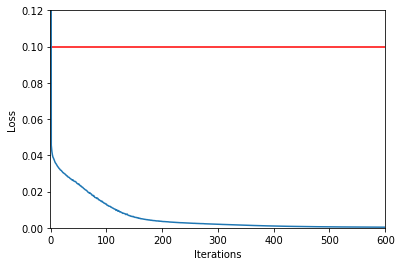

In [29]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.xlim(-0.5, 600)
plt.ylim(0, 0.12)
plt.plot(model.loss_curve_)
plt.show()

In [15]:
# taxa de erro obtida
model.loss_curve_[-1]

9.966704369772131e-05